<a href="https://colab.research.google.com/github/prbisv/NoteApplication/blob/master/model/LSTM/Chatbot_LSTM_DL_data_baru120.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Library

Import library yang diperlukan dalam pembuatan model chatbot.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import json
import pickle
import string
import re

import tensorflow as tf
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences

import sklearn
from sklearn.model_selection import train_test_split

# Loading Dataset

Menyiapkan dataset yang diperlukan dalam pembuatan model chatbot.

In [28]:
# Melihat dataset dalam dataframe

dataset = pd.read_csv('/content/drive/MyDrive/Capstone Project/Colab Notebook/all_new_label_edit_filtered.csv')

dataset

,Unnamed: 0,pertanyaan,jawaban,label
0,0,Apa artinya memiliki penyakit atau gangguan me...,Penyakit mental adalah kondisi kesehatan yang ...,definisi
1,1,Siapa saja yang dapat terkena penyakit atau ga...,Berdasarkan Sistem Registrasi Sampel yang dila...,definisi
2,2,Apa yang menyebabkan terjadinya penyakit atau ...,Penyebab gangguan mental belum diketahui secar...,definisi
3,3,Apa saja gejala-gejala penanda penyakit mental?,Gejala gangguan kesehatan mental sangat bervar...,definisi
4,4,Apakah penderita gangguan mental bisa sembuh?,Penderita gangguan mental tentu saja bisa semb...,definisi
...,...,...,...,...
1955,2264,"Setelah pertama kali bertemu klien, apa proses...",Mungkin tidak ada dua terapis yang sama karena...,konseling_fundamental
1956,2265,"Setelah pertama kali bertemu klien, apa proses...",Setiap konselor mungkin memiliki proses yang b...,konseling_fundamental
1957,2266,"Setelah pertama kali bertemu klien, apa proses...","Setelah bertemu dengan klien, banyak konselor ...",konseling_fundamental
1958,2267,"Setelah pertama kali bertemu klien, apa proses...",Seorang terapis yang baik akan membahas apa ya...,konseling_fundamental


In [29]:
# Menghapus kolom yang tidak diperlukan

dataset.drop(columns='Unnamed: 0', inplace=True)

dataset

,pertanyaan,jawaban,label
0,Apa artinya memiliki penyakit atau gangguan me...,Penyakit mental adalah kondisi kesehatan yang ...,definisi
1,Siapa saja yang dapat terkena penyakit atau ga...,Berdasarkan Sistem Registrasi Sampel yang dila...,definisi
2,Apa yang menyebabkan terjadinya penyakit atau ...,Penyebab gangguan mental belum diketahui secar...,definisi
3,Apa saja gejala-gejala penanda penyakit mental?,Gejala gangguan kesehatan mental sangat bervar...,definisi
4,Apakah penderita gangguan mental bisa sembuh?,Penderita gangguan mental tentu saja bisa semb...,definisi
...,...,...,...
1955,"Setelah pertama kali bertemu klien, apa proses...",Mungkin tidak ada dua terapis yang sama karena...,konseling_fundamental
1956,"Setelah pertama kali bertemu klien, apa proses...",Setiap konselor mungkin memiliki proses yang b...,konseling_fundamental
1957,"Setelah pertama kali bertemu klien, apa proses...","Setelah bertemu dengan klien, banyak konselor ...",konseling_fundamental
1958,"Setelah pertama kali bertemu klien, apa proses...",Seorang terapis yang baik akan membahas apa ya...,konseling_fundamental


# Exploratory Data Analysis

Eksplorasi dataset yang digunakan dalam proses pembuatan model chatbot.

In [30]:
# Melihat jumlah data pada setiap kategori

dataset.label.value_counts()

depresi                   359
keluarga                  334
hubungan                  328
kecemasan                 249
konseling_fundamental     240
harga_diri                 83
trauma                     66
cari_bantuan               58
perubahan_perilaku         51
definisi                   50
penyalahgunaan_zat         40
manajemen_emosi            38
tips_pengobatan            23
diagnosis_dini             22
peningkatan_pola_tidur     10
profesional_yang_benar      9
Name: label, dtype: int64

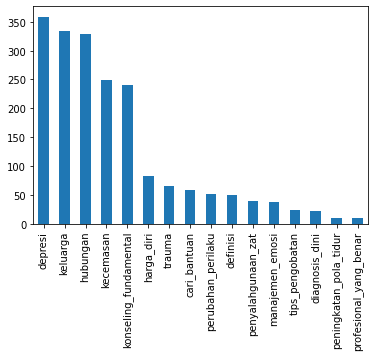

In [31]:
# Grafik jumlah data pada setiap kategori

dataset["label"].value_counts().plot.bar()

In [32]:
# Encoding label

from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

labeled = label_enc.fit_transform(dataset.label)
labeled

array([1, 1, 1, ..., 8, 8, 8])

In [33]:
# Mapping index

mapper = {}
for index,key in enumerate(dataset.label):
    if key not in mapper.keys():
        mapper[key] = labeled[index]
        
mapper

{'definisi': 1,
 'cari_bantuan': 0,
 'profesional_yang_benar': 13,
 'tips_pengobatan': 14,
 'depresi': 2,
 'kecemasan': 6,
 'keluarga': 7,
 'harga_diri': 4,
 'hubungan': 5,
 'trauma': 15,
 'manajemen_emosi': 9,
 'peningkatan_pola_tidur': 10,
 'penyalahgunaan_zat': 11,
 'perubahan_perilaku': 12,
 'diagnosis_dini': 3,
 'konseling_fundamental': 8}

In [34]:
dataset.label = dataset.label.map(mapper).astype({'label': 'int32'})

dataset

,pertanyaan,jawaban,label
0,Apa artinya memiliki penyakit atau gangguan me...,Penyakit mental adalah kondisi kesehatan yang ...,1
1,Siapa saja yang dapat terkena penyakit atau ga...,Berdasarkan Sistem Registrasi Sampel yang dila...,1
2,Apa yang menyebabkan terjadinya penyakit atau ...,Penyebab gangguan mental belum diketahui secar...,1
3,Apa saja gejala-gejala penanda penyakit mental?,Gejala gangguan kesehatan mental sangat bervar...,1
4,Apakah penderita gangguan mental bisa sembuh?,Penderita gangguan mental tentu saja bisa semb...,1
...,...,...,...
1955,"Setelah pertama kali bertemu klien, apa proses...",Mungkin tidak ada dua terapis yang sama karena...,8
1956,"Setelah pertama kali bertemu klien, apa proses...",Setiap konselor mungkin memiliki proses yang b...,8
1957,"Setelah pertama kali bertemu klien, apa proses...","Setelah bertemu dengan klien, banyak konselor ...",8
1958,"Setelah pertama kali bertemu klien, apa proses...",Seorang terapis yang baik akan membahas apa ya...,8


# Text Preprocessing

Pembersihan dataset yang digunakan dalam pembuatan model chatbot.

In [35]:
# Cleansing

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

def text_preprocessing(text):
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub(' ', text)
    return text

In [36]:
dataset['pertanyaan'] = dataset['pertanyaan'].apply(text_preprocessing)

dataset

,pertanyaan,jawaban,label
0,apa artinya memiliki penyakit atau gangguan me...,Penyakit mental adalah kondisi kesehatan yang ...,1
1,siapa saja yang dapat terkena penyakit atau ga...,Berdasarkan Sistem Registrasi Sampel yang dila...,1
2,apa yang menyebabkan terjadinya penyakit atau ...,Penyebab gangguan mental belum diketahui secar...,1
3,apa saja gejala gejala penanda penyakit mental,Gejala gangguan kesehatan mental sangat bervar...,1
4,apakah penderita gangguan mental bisa sembuh,Penderita gangguan mental tentu saja bisa semb...,1
...,...,...,...
1955,setelah pertama kali bertemu klien apa proses...,Mungkin tidak ada dua terapis yang sama karena...,8
1956,setelah pertama kali bertemu klien apa proses...,Setiap konselor mungkin memiliki proses yang b...,8
1957,setelah pertama kali bertemu klien apa proses...,"Setelah bertemu dengan klien, banyak konselor ...",8
1958,setelah pertama kali bertemu klien apa proses...,Seorang terapis yang baik akan membahas apa ya...,8


In [37]:
print(f"Total vocabulary: {dataset['pertanyaan'].apply(lambda x: len(x.split(' '))).sum()}")
print(f"Max length: {dataset['pertanyaan'].apply(lambda x: len(x.split(' '))).max()}")

Total vocabulary: 104754
Max length: 545


In [38]:
# Split data train dan test

X = dataset['pertanyaan']
y = pd.get_dummies(dataset['label'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(f'{X_train.shape} {y_train.shape}')
print(f'{X_test.shape} {y_test.shape}')

(1568,) (1568, 16)
(392,) (392, 16)


In [39]:
# Melihat total vocabulary dan max length pada data X_train

total_words = []
for i, v in enumerate(X_train.values):
    total_words.extend(v.split())

total_words = set(total_words)
print(f'Total vocabulary: {len(total_words)}')
print(f'Max length of the text: {max([len(teks) for teks in X_train])}')

Total vocabulary: 2876
Max length of the text: 3024


In [40]:
# Inisialisasi Tokenizer object

# Jumlah maksimum kata yang akan digunakan (paling sering)
MAX_NB_WORDS = 3000
# Jumlah maksimum kata dalam sequence
MAX_SEQUENCE_LENGTH = 150
# Fixed embedding
EMBEDDING_DIM = 150

tokenizer = Tokenizer(
    num_words=MAX_NB_WORDS,
    filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',
    lower=True,
    oov_token='<OOV>'
)

In [41]:
# Tokenizing, Sequencing, dan Padding

tokenizer.fit_on_texts(X_train.values)
nb_words = tokenizer.word_index

# Train
X_train = tokenizer.texts_to_sequences(X_train.values)
X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

# Test
X_test = tokenizer.texts_to_sequences(X_test.values)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

print(f'Found {len(nb_words)} unique tokens.')
print(f'Shape of data tensor: {X_train.shape}')

Found 2877 unique tokens.
Shape of data tensor: (1568, 150)


# LSTM Model

Pembuatan model chatbot LSTM.

In [42]:
# Membuat model

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_train.shape[1]),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 150)          450000    
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 150, 150)         0         
 lDropout1D)                                                     
                                                                 
 lstm_4 (LSTM)               (None, 150, 64)           55040     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 16)                1040      
                                                      

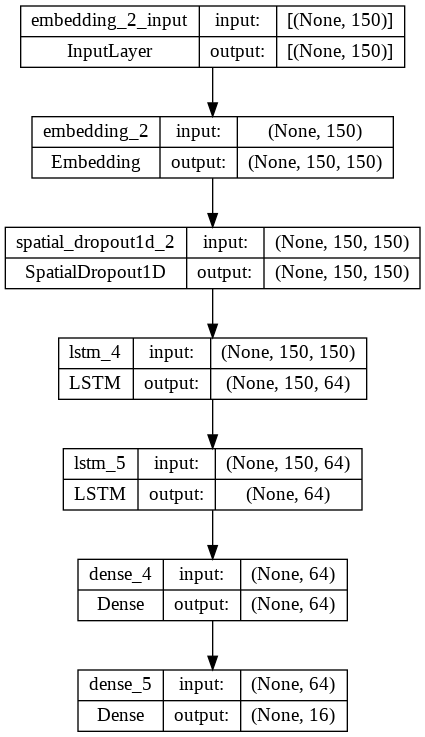

In [44]:
# Plot arsitektur model

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Training model

num_epochs = 120
batch_size = 128

train = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=num_epochs,
    batch_size=batch_size,
    verbose=2
    # callbacks=[EarlyStopping(monitor="val_loss", patience=2)]
)

Epoch 1/120
10/10 - 10s - loss: 1.0261 - accuracy: 0.5965 - val_loss: 1.6227 - val_accuracy: 0.4936 - 10s/epoch - 984ms/step
Epoch 2/120
10/10 - 10s - loss: 1.0021 - accuracy: 0.6029 - val_loss: 1.5712 - val_accuracy: 0.5318 - 10s/epoch - 974ms/step
Epoch 3/120
10/10 - 10s - loss: 0.9586 - accuracy: 0.6180 - val_loss: 1.6081 - val_accuracy: 0.5541 - 10s/epoch - 966ms/step
Epoch 4/120
10/10 - 10s - loss: 0.9525 - accuracy: 0.6316 - val_loss: 1.6550 - val_accuracy: 0.5510 - 10s/epoch - 965ms/step
Epoch 5/120
10/10 - 10s - loss: 0.8902 - accuracy: 0.6547 - val_loss: 1.6222 - val_accuracy: 0.5637 - 10s/epoch - 974ms/step
Epoch 6/120
10/10 - 10s - loss: 0.8647 - accuracy: 0.6691 - val_loss: 1.6310 - val_accuracy: 0.5605 - 10s/epoch - 976ms/step
Epoch 7/120
10/10 - 10s - loss: 0.8500 - accuracy: 0.6850 - val_loss: 1.6508 - val_accuracy: 0.5669 - 10s/epoch - 974ms/step
Epoch 8/120
10/10 - 10s - loss: 0.8329 - accuracy: 0.6746 - val_loss: 1.8068 - val_accuracy: 0.5287 - 10s/epoch - 987ms/step


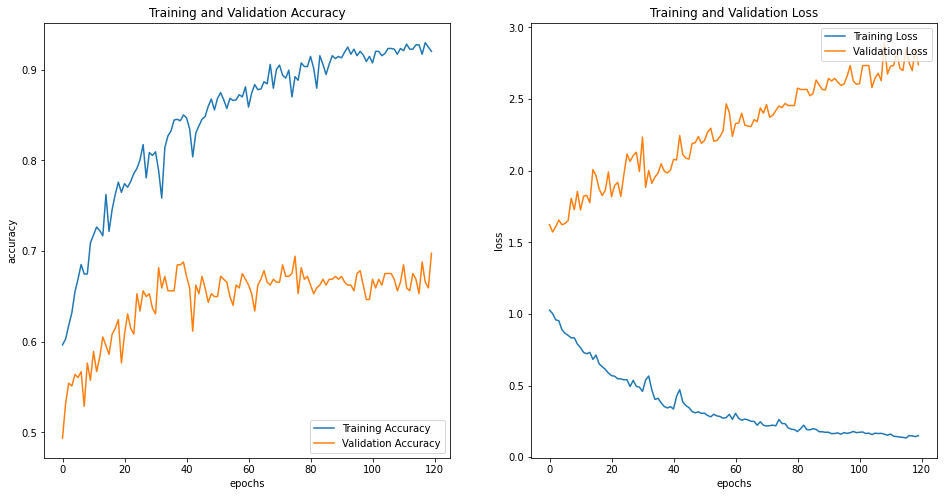

In [ ]:
# Grafik akurasi dan loss model

acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
# Save model dalam bentuk .h5

model.save("chatbot_model_lstm_withval_databaru120.h5")